# Calculo matricial
Antes de poder entrar en el problema de minimos cuadrados debemos estudiar algo de calculo matricial.

**Definicion 2.5.1**: (derivada de una matriz). Si $A=A(x)$ es una matriz $m \times n$, cuyos elementos $a_{ij}=a_{ij}(x)$ donde $x \in \mathbb{R}^p$, entonces para $A=[a_{ij}(x)]$ tenemos


$$\frac{\partial A}{\partial x_k} = \left [ \frac{\partial a_{ij}}{\partial x_k}   \right ] \quad , \quad k=1,2, \cdots, p \quad , \quad i=1,2, \cdots, m \quad , \quad j = 1, 2, \cdots, n $$
Ejemplo en el tablero a mano alzada.

**Teorema 2.5.1**: Las derivadas parciales (son el gradiente) de una matriz constante son 0.

***prueba**: Sea $A$ una matriz constante (no es funcion de $x$) entonces para cada componente $a_{ij}$,

$$ \frac{\partial A}{\partial x_k} = \left [ \frac{\partial a_{ij}}{\partial x_k}  \right ] = [0]  $$

Enseguida vemos la deriva del producto de una matrix constante por un vector. Rcuerde que si $a,x \in \mathbb{R}$,  $y=ax$, $dy/dx=a$.

$$\nabla_x Ax = A $$
llamamos $\nabla$ (gradiente) al tensor de todas las derivadas parciales.
Mas exactamente

$$\frac{\partial Ax}{\partial x_k }  = \nabla_k (Ax) = A_k$$
donde $A_k$ es la $k$ columna de $A$.

**Prueba**:
La $i$ componented de $Ax$ esta dada por

$$y_i = \sum_{j=1}^n a_{ij} x_j $$
por definicion de producto de matrices.

De forma que
Tenga en cuenta que $\partial x_i/\partial x_k = \delta_{ik}$

$$\frac{\partial y_i}{\partial x_k } = \sum_{j=1}^n a_{ij} \frac{\partial x_j}{\partial x_k} = \sum_{j=1}^n a_{ij} \delta_{kj} =a_{ik}$$
Si tomamos $i=1,2, \cdots, n$ nos genera la columna $k$ de $A$ es decir $A_k$.

Veamos ahora el gradiente de un producto interno.

**Teorema 2.5.3**: Asuma $f(x), g(x)$ dos funciones **vectoriales** sobre el vector $x \in \mathbb{R}^n$
entonces

$$\frac{\partial \langle f,  g \rangle }{\partial x_i}
=  \langle  \frac{\partial f}{\partial x_i} , g \rangle  
 +  \langle  f ,  \frac{\partial g}{\partial x_i}  \rangle
$$

**prueba**: Expandimos el producto interno

\begin{eqnarray}
\langle f, g \rangle = \sum_{j=1}^n \overline{f_j(x)} g_j(x)
\end{eqnarray}

Entonces:
\begin{eqnarray}
\frac{\partial \langle f, g \rangle }{\partial x_i} &=& \frac{\partial }{\partial x_i}  \sum_{j=1}^n \overline{f_j(x)} g_j(x) \\
&=& \sum_{j=1}^n  \frac{\partial \overline{f_i(x)}}{\partial x_i} g_j(x) + \overline{f_j(x)} \frac{\partial g_j(x)}{\partial x_i} \\
&=& \sum_{j=1}^n  \frac{\partial \overline{f_j(x)}}{\partial x_i} g_j(x) + \sum_{j=1}^n \overline{f_j(x)} \frac{\partial g_j(x)}{\partial x_i} \\
&=&  \langle  \frac{\partial f(x)}{\partial x}, g(x) \rangle   +
\langle f(x), \frac{\partial g(x)}{\partial x_i} \rangle
\end{eqnarray}

Nemotecnicamente podemos escribir

$$\frac{\partial \langle f, g \rangle}{\partial x_i} = \langle \nabla f, g \rangle + \langle f , \nabla g \rangle \tag{1}  $$
Pero ojo, con cuidado, realmente $\nabla f$ es una matriz. Dimensionalmente no es correcto por que estariamos haciendo el producto interno entre una matriz y un vector. Realmente lo que se puede hacer es tomar la componente (columna) $k$

$$\frac{\partial \langle f, g \rangle}{\partial x_i} = \langle (\nabla f)_k, g \rangle + \langle f , (\nabla g)_k \rangle. $$

**Ejemplo 2.5.1** (util para minimos cuadrados). Sea
$f(x) = \frac12 \| Ax - b \|^2$ con $x \in \mathbb{R}^n$, y $A$ matriz real $m \times n$. Encuentre $\nabla f$.

**Solucion**: Escribimos $f$ como producto interno

$$f(x) = \frac12 \langle Ax - b, Ax - b \rangle  $$
Los products internos son reales, entonces conmutan.

Tomemos la componente $k$, $\nabla_k f = (\nabla f)_k$

\begin{eqnarray}
\nabla_k f(x) &=& \frac12 \langle \nabla_k (Ax - b), Ax -b \rangle + \langle Ax-b, \nabla_k (Ax - b) \rangle \quad \text{por (1)} \\
&=& \langle \nabla_x (Ax -b), Ax-b \rangle \quad , \quad \text{conmutatividad del producto interno en reales} \\
&=& \langle A_k, Ax - b \rangle
\end{eqnarray}
Variando $k=1,2, \cdots, n$

$$\nabla f(x) = A^*(Ax-b) $$
Si queremos que $\nabla f=0$ entonces

$$A^* A x = A^* b  \tag{2} $$ A estas ecuaciones se les llama las **ecuaciones normales**.

## Los minimos cuadrados regularizados.
Se desea resolver el problema

$$Ax=b $$
Si $A$ tiene inversa, listo

$$x = A^{-1} b  $$
que $A$ tenga inversa es otra historia. Es poco probable.

Existen varias posibilidades:

1. La matriz $A$ esta **sobredeterminada**. Hay mas filas linealmente independientes que columnas. Hay mas "ecuaciones que incognitas".

$$x+y + 3 = 5 \\ x+ y  + 1 = 6 \\ x+y+4=2  $$
En este caso se resuelven las ecuacion normales  (2). En este caso el espacio nulo es $\{ 0 \}$
Las columnas de la matriz son $(1,1)^T$. Estas columnas no me generan $\mathbb{R}^2$. El espacio columna (rango) no genera todo el espacio $\mathbb{R}^2$.

2. La matriz $A$ sea **subdeterminada**. "Hay mas incognitas que ecuaciones".
Por ejemplo

$ x + 3 y = 1$

Esta ecuacion tiene un numero infinito de soluciones. Por ejemplo $y=0, x=1$.
En este caso el espacio nulo no es 0. Es decir $\mathcal{N}(A) \ne \{ 0 \}$.
Lo vamos ver.

El problema de minimos cuadrados es convexo. Una funcion es convexa si al unir dos puntos sobre la grafica, el resto de la grafica (en el mismo dominio de los puntos) esta por debajo. Si la funcion es de una variable es convexa si su segunda derivada es positiva.  Ej: $f(x)=x^2$, $f''(x)=2>0$.

Si $Ax = b$ no tiene solucion, es posible que las ecuaciones normales si

$$A^* A x = A^* b $$
esto si $A^*A$ tiene inversa (cuando las columnas de $A$son linealmente independientes). La solucion es

$$x = (A^* A)^{-1} A^* b $$

Podria pasar (cuando las columnas de $A$ no son linealmente independientes)
el problema

$$f(x) = \| A x - b \|^2 $$
tenga un numero infinito de soluciones. Tikhnov (Ruso) introdujo algo que se llama **regularizacion**, se suma una funcion penalti para asegurar que la solucione es unica.

$$f(x) = \| A x - b \|^2 + \| \Gamma x \|^2 \tag{3} $$
donde $\Gamma$ es una matriz positiva definida.

Tarea: Usando la misma tecnica del Teorema 2.5.1 el estudiante debe probar que la solucion de este problema es

$$x = (A^*A + \Gamma^* \Gamma)^{-1} A^* b  $$
Cuando haga la tarea e iguale el gradiente a 0

$$(A^* A + \Gamma^* \Gamma)x = A^* b $$

$A$ es positiva definida si $\forall x$ $x^T A x > 0$
Tambien cuando **todos** los autovalores son positivos.

Hay una matriz que se usa en literatura

$$\Gamma = \sqrt{\lambda} I $$
se obtiene

$$(A^*A + \lambda I) x = b  $$

en este caso la solucion es
$$x = (A^* A + \lambda I)^{-1} A^* b  \quad \lambda >  0. \tag{4} $$

Nombres: A la regularizacion de Tikhonov (3) tambien se le conoce con los nombres de **weight decay**, **constrained linear inversion**, **Tikhnov-Miller method**, **Phillips-Twomey method**.


A la ecuacion (4) en estadistica se le llama **ridge regression**.

Como se podria llegar intuitivamente a  la ecuacion (4)

1. Arranque $Ax = b $.
2. Si $A$ no tiene inversa, multiplique a ambos lados por $A^*$ y obtenga
$$A^* A = A^* b $$
3. Si $A^* A$ es invertible entonces
$$x = (A^* A)^{-1} A^* b $$. Fin del problema
4. Si $A^*A*$ no es invertible entonces "sumele una basurita en la diagonal" para empujar el especro al lado positivo.

$$(A^* A  + \lambda I)x = A^* b $$
La matriz $A^* A + \lambda I$ es positiva definida y tiene inversa por lo que

$$x = (A^* A + \lambda I)^{-1} A^* b.$$

El problema de ridge regression se puede escribir como la minizacion

$$J(x) = \frac12 \| Ax - b \|^2 + \lambda \| x \|^2 $$
esta es basicamente la ecuacion (3) con un factor de $\frac12$ que no cambia la localizacion del minimo.

Este problema se puede ver como multiplicadores de Lagrange.

$$\min_x \frac12 \| Ax - b \|^2 $$
con la restriccion

$$\| x \|^2 \le c $$

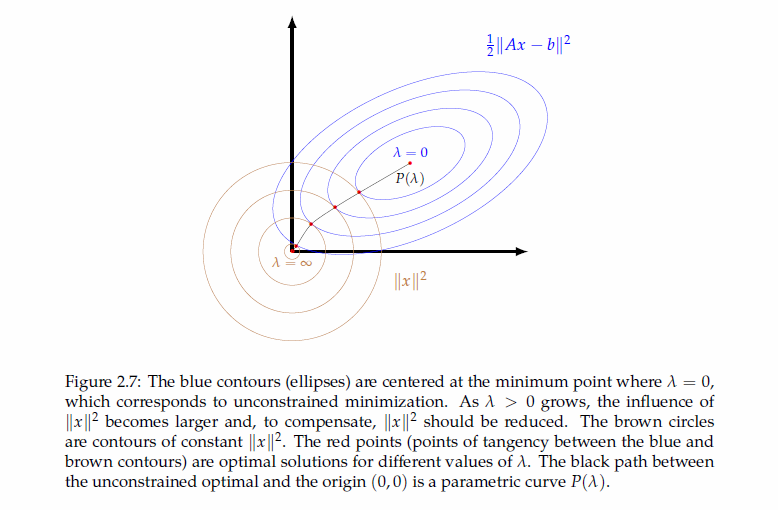

# Pseudoinversa
La notas de clase Jaramillo and Rueger tienen un desarrollo mas detallado de la pseudoinversa.  Este es un resumen.

El problema central es resolver

$$Ax = b. $$
La cuestion es que $A$ puede una matriz que ni siquiera es cuadrada.

* Si $A$ tiene inversa, es "facil"
 $$ x = A^{-1} b$$.
 pero lo mas probable es que $A$ no tenga inversa. Es mas que ni siquiera sea cuadrada. Entonces la inversa es muy escaza. Casi ninguna matriz tiene inversa. Pero cada matriz $A$ tiene  una unica pseudoinversa (el tema de esta clase) .

 Veamos cmo resolver $Ax =b$.

 * Caso 1: Si $b \in \mathcal{R}(A)$, la solucion existe. Existen varias ramas (condicionales "if"):
    * Si $\mathcal{N}(A) = \{ 0 \}$, existe la inversa de $A$, la solucion es unica y esta es $x=A^{-1}b$ y $A^{-1}$ es la pseudoinversa que se nota
    $$A^{+} = A^{-1} $$
    * Si $\mathcal{N}(A) \ne \\{ 0 \\}$ entonces la solucion que existe pero no es unica. Veamos. Asuma que $x$ es una solucion de $Ax=b$, asuma que $0 \ne x_0 \in \mathcal{N}$. Veamos que $y=x + x_0$ es solucion de $Ax=b$
    $$A y  = A(x + x_0) = Ax + \require{cancel} \cancel{A x_0}= Ax = b  $$
    Hay un numero infinito de soluciones. Si escojemos la mas pequenha de todas. Esta es unica. Asuma que la mas pequenha es $\min \| x \|$
    entonces $A^+$ esta definida como la matriz tal que
    $$x = A^+ b$$

**Ejemplo**: Asuma que $A=(2, 3)$. El rango de $A$ son todos los reales,
Los $y$ tales que $Au$, $u=(x,y)^T$

$$ A u = (2, 3 ) \binom{x}{y}  = 2x + 3y  $$
esto me cubre todos los reales. Cualquier $b \in \mathbb{R}$,
$$2x + 3y = b $$
tiene solucion. En particular $b=5$

$$2x + 3y = 5 $$

Esta ecuacion tiene un numero infinito de soluciones. El espacio nulo esta dado por la linea generada por el vector $x=-3, y=2$ , que es una de las soluciones de $2x + 3y=0$. Es decir, en este ejemplo simple el espacio nulo es

$$\mathcal{N} = \alpha \binom{-3}{2}  $$
donde $\alpha \in \mathbb{R}$. Es una recta.  Veamos una ilustracion grafica.




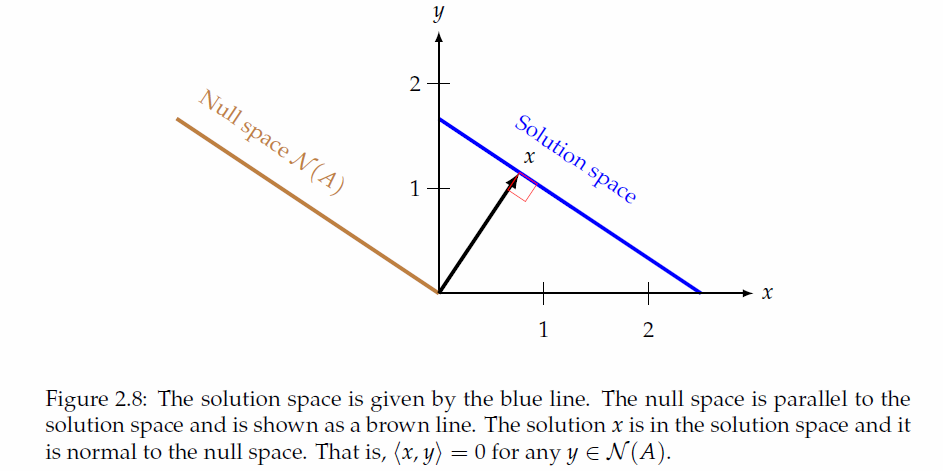

En la grafica:
* Todos los reales son rel rango $\mathcal{R}(A)$.
* La recta azul es el espacio solucion
* La recta cafe es el espacio nulo.
* el punto $x$ es la base de la perpendicular de $0$ al espacio solucion. El punto $x$ es ortogonal al espacio nulo, es decir

$$\langle x, y \rangle=0 $$
$\forall y \in \mathcal{N}(A)$.

En este caso la solucion es

$$x = \binom{0.76923}{1.15385} $$
A esta solucion se le conoce como la **pseudosolucion**. Si existe $A^+$ tal que
$$ x  = A^+ b$$
entonces $A^+$ es la seudoinversa.

* Caso 2:
* Si $b \notin \mathcal{R}(A)$
Esto quiere decir que $Ax= b$ no tiene solucion. Por que?
Recuerde uno de los teoremas $Ax=\sum_i x_i A_i$ ($A_i$ columna $i$ de $A$ expande el rango de $A$)
    * Si $\mathcal{N}=\\{0\\}$ entonces la solucion es unica. La proyeccion de $b$ al rango se da con las ecuaciones normales.  En este caso las ecuaciones normales resuelven el problema

    $$A^* A x = A^* b $$
    y $A^* A$ tiene inversa
    La solucion es
    $$x = (A^* A)^{-1} A^* b  $$
    Y la pseudoinversa es:

    $$A^+ = (A^* A)^{-1} $$

    * Si $\mathcal{N} \ne \\{ 0 \\}$ entonces la solucion no es unica y $A^* A$ no tiene inversa. Entonces regularizamos

    $$x = (A^* A + \lambda I)^{-1} A^* b $$
    La pseudoinversa es calcula con el limite cuando $\lambda \to 0$.

    $$A^+ = \lim_{\lambda \to 0} (A^* A + \lambda I)^{-1} A^* $$


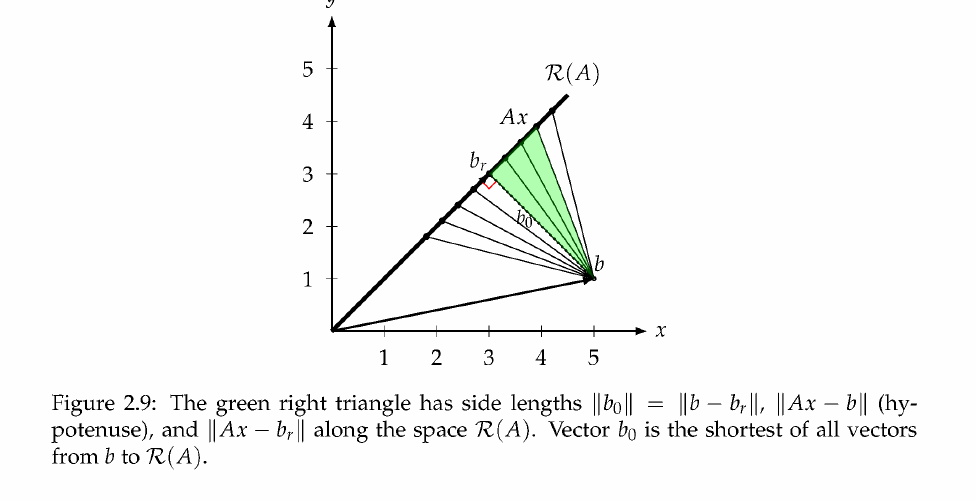

En la Figura 2.9, $b \notin \mathcal{R}(A)$, o sea que $Ax = b$ no tiene
solucion. Para hallar la pseudosolucion proyectamos $b$ al rango de $A$. Esta proyeccion se nota como $b_r$. Ahora si el sistema $Ax=b_r$ **tiene solucion**.
Pero si $\mathcal{N} \ne   \{0 \}$ la solucion no es unica y toca escojer la que es ortogonal al espacio nulo.

Veamos el peor de los dos mundos:
1. Que $b \notin \mathcal{R}(A)$
2. Que $\mathcal{N}(A) \ne \{ 0 \}$

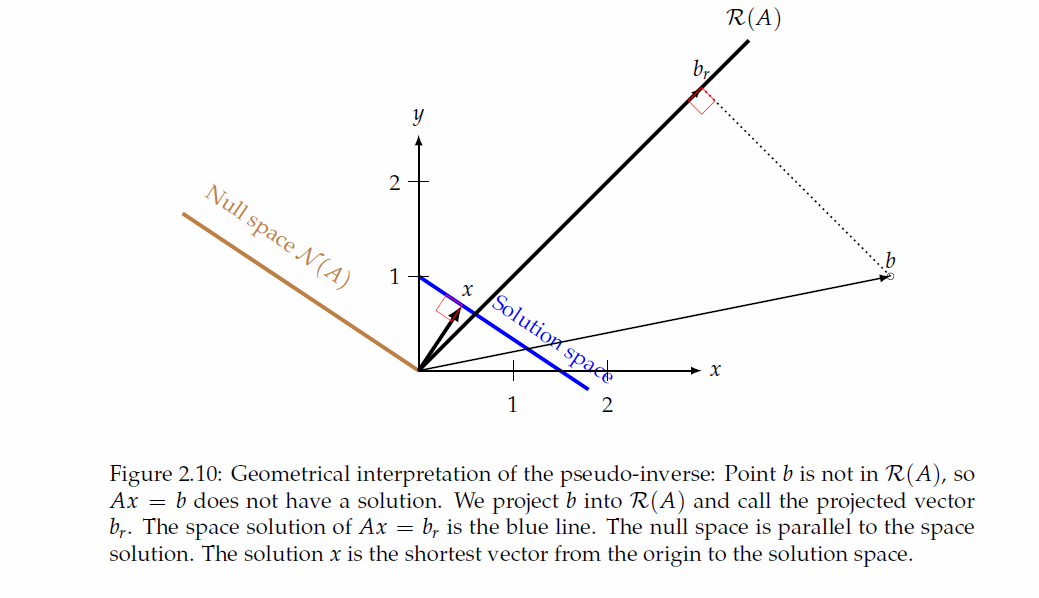

Dos pasos principales
1. Proyecte $b$ al $\mathcal{R}(A)$. Llame esta proyeccion $b_r$.
2. Resuelva $Ax = b_r$ (tiene infinito numero de soluciones)
3. Tome la solucion $x$ que es ortogonal al espacio nulo. Es decir
$\langle x, y \rangle = 0$, para $y \in \mathcal{N}(A)$.




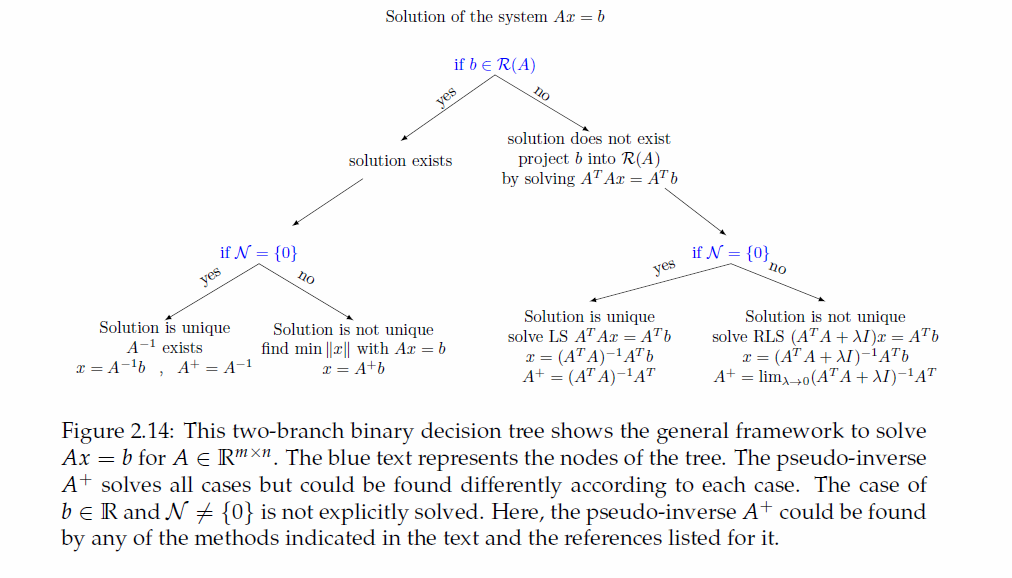


Hay varias definiciones de seudoinversa.
La definicion de Keener (en las referencias)

La "least square pseud-inverse" of $A$ is a matrix $A^+$ such that

1. $$A^* A x = A^* b  $$
2. $\langle x, w \rangle = 0$
para cada $w \mathcal{N}(A)$.

## Algoritmo para la pseudoinversa.
Hay varios algoritmos solo explico uno. El uso de SVD.

Asuma que
$$A = U \Sigma V^* $$
donde

$$\Sigma = \begin{pmatrix} \Sigma_r & \vdots & 0 \\
\cdots & \cdots & \cdots  \\
0 & \vdots & 0 \end{pmatrix}  $$
La submatrix $\Sigma_r$ tiene los valores singulares que no son nulos.
Definimos la pseudoinversa de $\Sigma_r$

$$\Sigma_r^+ = \begin{pmatrix} \sigma_1^{-1} & 0 & 0 & \cdots & 0 \\
0 & \sigma_2^{-1} & 0 & \cdots & \vdots   \\
\vdots & \vdots & \ddots  & \ddots & \vdots  \\
0 & 0 & \cdots & \cdots & \sigma_r^{-1} \end{pmatrix}  $$

$$\Sigma^+ = \begin{pmatrix} \Sigma_r^+ & \vdots & 0 \\
\cdots & \cdots & \cdots  \\
0 & \vdots & 0 \end{pmatrix}  $$

La pseudoinversa de $A$ es

$$A^+ = V \Sigma^+ U^* $$